In [21]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Read the CSV file
df=pd.read_csv("titanic.csv")
# Drop the Unnecessary coloumns
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print("Percentage of Null values in Each column \n",round(df.isnull().sum()/len(df.index)*100,2))
# Check the Meta info
df.info()
# Check for the outliers
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,1])
df['Embarked'].value_counts()

Percentage of Null values in Each column 
 Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.22
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
df_outlier=df[['Survived','Pclass' ,'Age','SibSp','Parch','Fare']]

Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1

((df_outlier < (Q1 - 1.5 * IQR)) | (df_outlier > (Q3 + 1.5 * IQR))).sum()

Survived      0
Pclass        0
Age          11
SibSp        46
Parch       213
Fare        116
dtype: int64

In [67]:
#!pip install plotly
import plotly.express as px
fig = px.violin(df, y="Age", box=True, points='all', title="People Age")
fig.show()

In [68]:
df['Embarked']=df['Embarked'].fillna('S')
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

C:\Users\devnext\.conda\envs\titanic_env\lib\site-packages\seaborn\axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



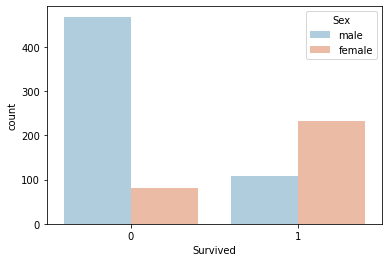

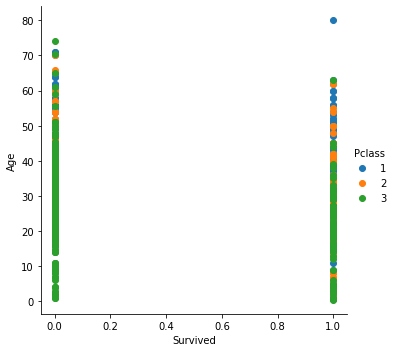

In [53]:
 sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')
    
sns.FacetGrid(df, hue=("Pclass"), size=5).map(plt.scatter, "Survived","Age").add_legend()



In [56]:
for col in df.columns:
    print(col, ': ', len(df[col].unique()), ' labels')

Survived :  2  labels
Pclass :  3  labels
Sex :  2  labels
Age :  89  labels
SibSp :  7  labels
Parch :  7  labels
Fare :  248  labels
Embarked :  3  labels


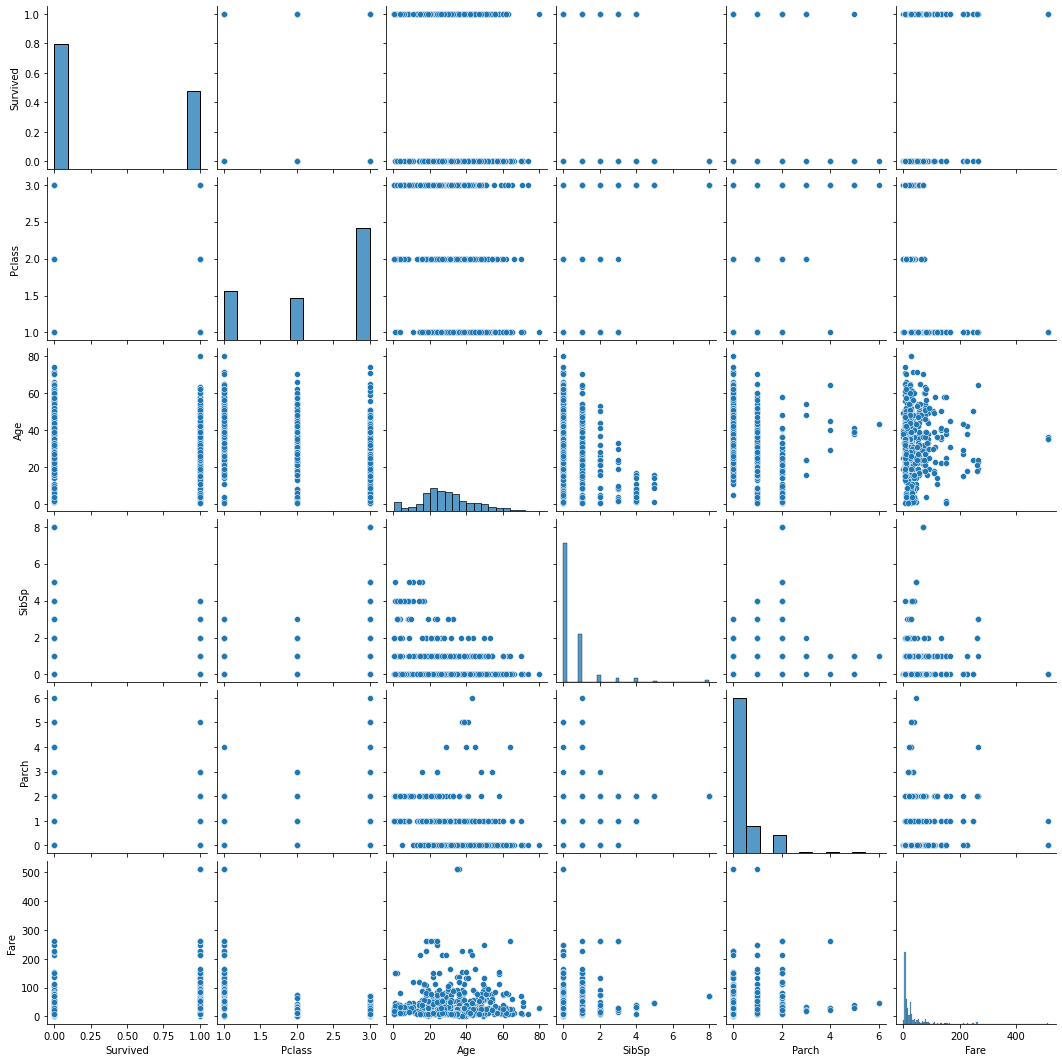

In [57]:
sns.pairplot(df) 

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


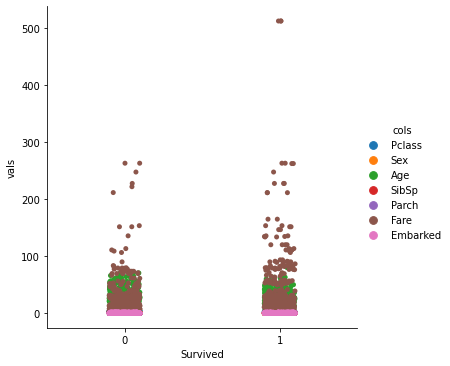

In [86]:
df01 = df.melt('Survived', var_name='cols',  value_name='vals')
#sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')
g = sns.catplot(x="Survived", y="vals", hue='cols', data=df01, kind='strip')

#g = sns.boxplot(x="Survived", y="vals", hue='cols', data=df01)



In [69]:
df['Sex'].replace(['female', 'male'], [0,1], inplace = True)
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)

In [84]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [87]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [88]:
!pip install pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\devnext\\.conda\\envs\\titanic_env\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached spacy-2.3.5-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached thinc-7.4.5-cp38-cp38-win_amd64.whl (910 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached blis-0.7.4-cp38-cp38-win_amd64.whl (6.5 MB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached preshed-3.0.5-cp38-cp38-win_amd64.whl (112 kB)
  Using cached murmurhash-1.0.5-cp38-cp38-win_amd64.whl (21 kB)
  Using cached srsly-1.0.5-cp38-cp38-win_amd64.whl (178 kB)
  Using cached cymem-2.0.5-cp38-cp38-win_amd64.whl (36 kB)
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Using 

In [96]:
from pycaret.classification import *

In [101]:
clf1=setup(data=df,
          target='Survived',
          numeric_imputation='mean',
          categorical_features=['Sex','Embarked']
          )

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8219,0.8791,0.7210,0.7947,0.7537,0.6149,0.6186,0.0390
gbc,Gradient Boosting Classifier,0.8091,0.8707,0.6616,0.7941,0.7190,0.5779,0.5847,0.0790
lr,Logistic Regression,0.8042,0.8573,0.6962,0.7626,0.7240,0.5740,0.5783,1.7910
ridge,Ridge Classifier,0.8026,0.0000,0.6792,0.7714,0.7176,0.5684,0.5741,0.0100
rf,Random Forest Classifier,0.7946,0.8564,0.7000,0.7460,0.7186,0.5579,0.5614,0.1850
lda,Linear Discriminant Analysis,0.7946,0.8557,0.6750,0.7574,0.7084,0.5522,0.5581,0.0110
ada,Ada Boost Classifier,0.7929,0.8400,0.7254,0.7274,0.7234,0.5584,0.5612,0.0870
dt,Decision Tree Classifier,0.7835,0.7710,0.7042,0.7208,0.7100,0.5377,0.5398,0.0140
et,Extra Trees Classifier,0.7801,0.8341,0.7082,0.7113,0.7085,0.5322,0.5333,0.1680
knn,K Neighbors Classifier,0.7142,0.7662,0.5600,0.6396,0.5959,0.3771,0.3797,0.0200


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=397, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [92]:
import sys
!{sys.executable} -m pip install pycaret

  Using cached pycaret-2.3.0-py3-none-any.whl (261 kB)
  Using cached lightgbm-3.1.1-py2.py3-none-win_amd64.whl (754 kB)
  Using cached pandas_profiling-2.11.0-py2.py3-none-any.whl (243 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached mlflow-1.14.1-py3-none-any.whl (14.2 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached pyLDAvis-3.2.2-py2.py3-none-any.whl
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Using cached nltk-3.5-py3-none-any.whl
  Using cached spacy-2.3.5-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  U

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\devnext\\.conda\\envs\\titanic_env\\Lib\\site-packages\\~cipy\\.libs\\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [98]:
from sklearn.model_selection import train_test_split
X  = df.drop("Survived", axis = 1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [99]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', min_samples_leaf=1, min_samples_split=16, n_estimators=700)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))


Accuracy: 0.8547486033519553
Recall/Sensitivity: 0.8


In [103]:
rf_model.predict([[1, 0, 40.0, 1, 0, 93.5, 1]])[0]

1

In [104]:
import pickle
file = open('random_forest_titanic_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

In [105]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1
